# Clustering Techniques Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D212: Data Mining II
### Professor Keiona Middleton
### June 12, 2023

### A1: PROPOSAL OF QUESTION

The research question I have decided to pursue using the Churn dataset is as follows:

“How effectively can we apply hierarchical clustering to divide the customer base into discrete groups based exclusively on their subscription to and use of identified services and devices?”

More broadly, my research question endeavors to select the binary categorical variables related to services provided by the organization. This could be described as a component in the process of behavioral segmentation, seeking to identify patterns in customer purchase and subscription behavior to better tailor marketing efforts to the groups identified through the analysis (Kamara, 2021).

### A2: DEFINED GOAL

As mentioned in section A1, the business motivation of this analysis is to identify behavioral segmentation in the customer base with an intent to tailor marketing and advertising efforts to the identified groups. Our chief metric for determining the success or failure of the analysis will be the calculation of a silhouette score using our final selected hierarchical clustering model. A silhouette score ranges from -1 to 1, where -1 indicates clusters that are worse than random assignation at distinction from observations in other clusters and similarity of observations in the same clusters, 0 indicates functional equivalence to random assignation, and 1 indicates perfect distinction from observations in other clusters and similarity with other observations within the same cluster. With this in mind, we will describe our primary goal as the attainment of a silhouette score equal to or greater than .5 to indicate successful behavioral segmentation within our cluster analysis.

### B1: EXPLANATION OF CLUSTERING TECHNIQUE

The specific algorithm that I am using to demonstrate hierarchical clustering is known as agglomerative clustering. Essentially, the algorithm seeks to cluster data points together based on their similarity. This is determined through the application of a mathematical distance metric, which varies based on the variables being evaluated. In the case of our own analysis, since we are only utilizing categorical variables (specifically binary categorical variables), our distance metric will be Hamming distance, or a measure of the lowest possible number of substitutions necessary to make one binary string equivalent to another binary string of the same length. This lends itself perfectly to our variables, as all are binary.

As to the process itself, the first step in the algorithm is to initially give every observation its own cluster. Next, all pairs of observations are evaluated using the selected distance metric, based on these calculations, the data pair with the shortest distance is merged, and the distance calculations are updated to reflect the distance between the new cluster and the other clusters based on the identified linkage criteria. In our analysis, we have elected to use average linkage, meaning that our distance calculation between clusters is the result of averaging the pairwise distances between all individual data pairs between clusters.

In our analysis, our stopping criterion is generated programmatically based on an evaluation of the silhouette score of different numbers of generated clusters using the main algorithm. As we described before, the silhouette score refers to how similar observations are to one another within their own clusters, and how distinct they are from observations in other clusters. This is calculated using average distances generated by our distance metric. Essentially, the formula is:

Silhouette = ((Average pairwise distance within cluster) - (Average pairwise distance between nearest neighboring cluster)) / (The larger of the two average distances)

In our analysis, the average silhouette score of all observations is calculated using different numbers of clusters, and the number of clusters that returns the best silhouette score is selected as the optimal model. In this way, the stopping criteria in our final model is when the algorithm reaches the optimal number of clusters during the merging process.

### B2: SUMMARY OF TECHNIQUE ASSUMPTION

One assumption of a hierarchical clustering algorithm is that the similarity measure, or distance metric as we have described it, is appropriate for the variables selected for evaluation. In our analysis, this similarity measure refers to the calculation of Hamming distance, which has been selected over metrics such as Euclidean or Manhattan distance, based on the fact that all variables used in the analysis are either natively binary, or appropriately re-expressed as such via one-hot encoding.

B3: PACKAGES OR LIBRARIES LIST

We have elected to use several Python libraries throughout our analysis. Each package serves an important function in the process of the hierarchical clustering technique. At this time, we will briefly describe the function of each library in the context of our analysis.

Pandas: Pandas will serve as our primary toolset for generating and manipulating dataframes. In this analysis, we will use Pandas to generate dataframe objects from our source .csv file, instantiate new dataframes, and make copies of existing dataframes.

Matplotlib.pyplot: This graphical module will be used to generate the visualizations for our intermediate and final results.

Sklearn: A toolset used in the construction of a wide array of models and tasks related to data analytics. Several modules from this library are used in the course of our analysis, as listed below:
<br>.preprocessing: Used for encoding categorical features.
<br>.cluster: Specifically, we are importing the AgglomerativeClustering class object to use as the base of our hierarchical clustering model.
<br>.metrics: Specifically, we are importing the silhouette_score function to calculate that measure, and the pairwise_distances function to access Hamming distance calculations and utilize them in our model by way of a precomputed distance matrix.

### C1: DATA PREPROCESSING

One data preprocessing goal for this analysis is to re-express our identified categorical variables into standardized binary, with “Yes” encoded as 1, and “No” encoded as 0 (Kamara, 2021). This occurs naturally with the default behavior of Sklearn’s ordinal encoding method, as it encodes categorical classes alphabetically. However, we have also elected to included InternetService in our list of included features. For this feature, we will instead utilize one-hot encoding via Sklearn’s nominal encoding method in order to generate dummy columns for InternetService’s classes, which include “None,” “DSL,” and “Fiber Optic.” We will then drop the “None” column from our dataframe to abide by the K-1 rule, along with the source InternetService column. This will conclude the re-expression of our categorical variables.

### C2: DATASET VARIABLES

We will now list the features used in the analysis, along with their classification as either categorical or numeric, and their encoding method. The following dataset variables have been selected for inclusion in our clustering analysis:

InternetService: categorical (encoded nominally via one-hot encoding)
<br>Port_modem: categorical (encoded ordinally)
<br>Tablet: categorical (encoded ordinally)
<br>Phone: categorical (encoded ordinally)
<br>Multiple: categorical (encoded ordinally)
<br>OnlineSecurity: categorical (encoded ordinally)
<br>OnlineBackup: categorical (encoded ordinally)
<br>DeviceProtection: categorical (encoded ordinally)
<br>TechSupport: categorical (encoded ordinally)
<br>StreamingTV: categorical (encoded ordinally)
<br>StreamingMovies: categorical (encoded ordinally)
<br>PaperlessBilling: categorical (encoded ordinally)

### C3: STEPS FOR ANALYSIS

Due to the data types of the features selected for this analysis, we have minimal steps to perform in preprocessing the data.
First, we will quickly check the data set for duplicate rows and nullity. Because all of our selected features are categorical, we will not detect or treat for outliers. Next, we will re-express our categorical features numerically so that they can be expressible as binary strings in accordance with the requirements of our distance metric calculations. Once our variables are re-expressed, we will be able to begin our analysis.

For the purposes of continuity, we will summarize our data preprocessing procedures throughout the code in markdown cells as the given steps are executed.

#### First, we will import all of our necessary libraries.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances

#### We import our base dataframe from the provided .csv file and make a copy.

In [120]:
#Import the churn dataset from the source csv file and make a dataframe out of it.
raw_df = pd.read_csv('churn_clean.csv')

#Make a copy of the imported dataframe in case we would like to inspect or manipulate the raw data. 
df = raw_df.copy()
#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()

#### Now we can detect and treat duplicates.

In [121]:
#Drop any duplicate rows from the dataframe
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
#Check for duplicates using assertion statements on columns purported to contain unique values.
#This is a more in-depth approach to ensure that no duplicates remain.
assert df['Customer_id'].duplicated().all() == False
assert df['Interaction'].duplicated().all() == False

False    10000
dtype: int64


#### Next, we will detect and treat any null values.

In [122]:
#Make a list out of the names of the columns that have missing data.
missing_cols = df.columns[df.isnull().any()].to_list()
print(missing_cols)
#Drop any rows containing nullity
df.dropna(how='all')
assert len(missing_cols) == 0

[]


#### We can now define which variables will be used in our analysis.

In [123]:
#Define our selected features.
X_cols = ['Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
print(X_cols)

['Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


#### We will next construct a base dataframe so that we can more easily roll in features encoded via different methods.

In [124]:
#Make a new dataframe for manipulation
XY_cols = []
XY_cols.extend(X_cols)

XY_df = pd.DataFrame()
for col in XY_cols:
    XY_df[col] = df[col]
print(XY_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Port_modem        10000 non-null  object
 1   Tablet            10000 non-null  object
 2   InternetService   10000 non-null  object
 3   Phone             10000 non-null  object
 4   Multiple          10000 non-null  object
 5   OnlineSecurity    10000 non-null  object
 6   OnlineBackup      10000 non-null  object
 7   DeviceProtection  10000 non-null  object
 8   TechSupport       10000 non-null  object
 9   StreamingTV       10000 non-null  object
 10  StreamingMovies   10000 non-null  object
 11  PaperlessBilling  10000 non-null  object
dtypes: object(12)
memory usage: 1015.6+ KB
None


#### To encode, we must first decide which categorical features will be encoded ordinally, and which will be encoded nominally via one-hot encoding.

In [125]:
#Generate our lists of categorical features to be encoded using each method.
nom_enc_cols= ['InternetService']
ord_enc_cols= []

for col in XY_cols:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        if col not in nom_enc_cols:
            ord_enc_cols.append(col)

print(nom_enc_cols)
print(ord_enc_cols)

['InternetService']
['Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


#### Now we can use one-hot encoding to re-express our nominal categorical features. We will also perform some string manipulation on the column names and drop one encoded column per base variable to abide by the K-1 rule.

In [126]:
#We are nearly ready to start encoding.
#Make a blank dictionary to be used in the encoding and imputation process.
nom_enc_dict = {}
#Create a blank dataframe specifically for the nominal encoding process
nom_df = pd.DataFrame()

for col_name in nom_enc_cols:
    nom_enc_dict[col_name] = preprocessing.OneHotEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    nom_vals = nom_enc_dict[col_name].fit_transform(reshaped_vals)
    nom_df_loop = pd.DataFrame(nom_vals.toarray(), columns=nom_enc_dict[col_name].get_feature_names_out())
    nom_df_loop.index = col_not_null.index
    nom_df = nom_df.join(nom_df_loop, how='outer')

#Search all column names in nom_df and if they start with 'x0_', remove 'x0_' from the string. 
for col in nom_df.columns:
    if col.startswith('x0_'):
        new_col_name = col.replace('x0_', '')
        nom_df.rename(columns={col: new_col_name}, inplace=True)

#Now we should drop one of our dummy columns for each of our original columns to abide by the K-1 rule.
nom_df.drop(columns = ['None'], inplace=True)

#Print our final list of nominally encoded columns
print(nom_df.columns.tolist())

['DSL', 'Fiber Optic']


#### Next we perform a similar process for our ordinal columns. Due to the default behavior of the class object, the encoder orders the classes alphabetically, which conveniently is the correct logical order for all of our affected features. 

In [127]:
#As before, we will make a blank dictionary and dataframe.
ord_enc_dict = {}
ord_df = pd.DataFrame()

#Ordinally encode the features
for col_name in ord_enc_cols:
    ord_enc_dict[col_name] = preprocessing.OrdinalEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    ord_vals = ord_enc_dict[col_name].fit_transform(reshaped_vals)
    ord_df_loop = pd.DataFrame(ord_vals, columns=ord_enc_dict[col_name].get_feature_names_out())
    ord_df_loop.index = col_not_null.index
    ord_df[col_name] = ord_df_loop

print(ord_df.columns.tolist())

['Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


#### Now we can roll our encoded data into a new dataframe and drop our nominal source columns.

In [128]:
#make an encoding dataframe for manipulation
enc_df = XY_df.copy(deep=True)
for col in ord_df.columns:
    enc_df[col] = ord_df[col]
for col in nom_df.columns:
    enc_df[col] = nom_df[col] 

enc_df.drop(columns=['InternetService'], inplace=True)
X_cols.append('DSL')
X_cols.append('Fiber Optic')

for col in enc_df.columns:
    if col not in X_cols:
        enc_df.drop(columns=[col], inplace=True)

print(enc_df.columns)
print(X_cols)

Index(['Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'DSL', 'Fiber Optic'],
      dtype='object')
['Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'DSL', 'Fiber Optic']


#### Create one more dataframe as a breakpoint in case we would like to implement additional preprocessing steps on subsequent analyses.

In [129]:
XY_initial_df = enc_df.copy(deep=True)

#### The data is now fully prepared for analysis.

At this point, we can export our fully prepared dataset by utilizing the DataFrame.to_csv() function in the pandas library. This file will be included in the final submission and available for evaluation via the WGU submission portal.

In [130]:
XY_initial_df.to_csv('Cluster_cleaned.csv', index=False)

### D1: OUTPUT AND INTERMEDIATE CALCULATIONS

As described in part B1, we will be using agglomerative clustering, a hierarchical clustering algorithm, to generate optimal clusters for the observations in our data set.

To accomplish this, we will first generate pairwise distances between all observations in the dataset and create a distance matrix of the results. This distance matrix will be used as our metric argument in the AgglomerativeClustering model, and will be re-evaluated at each iteration of clustering using average linkage.

The model will iterate between up to 10 clusters, beginning at 2 clusters. A silhouette score will be calculated at each number of clusters, and line plot will be generated to reflect these scores. Finally, the number of clusters with the best silhouette score will be saved and returned, along with its score to indicate our results.

The results of these calculations will be displayed visually after executing the following code:

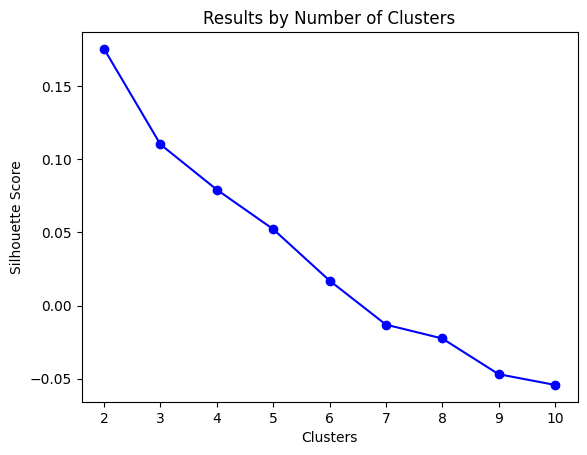

Silhouette score for 2 clusters: 0.17544472117829582
Silhouette score for 3 clusters: 0.11016927488957368
Silhouette score for 4 clusters: 0.07923415615114064
Silhouette score for 5 clusters: 0.05222183521602339
Silhouette score for 6 clusters: 0.01707179993263328
Silhouette score for 7 clusters: -0.013033979083332424
Silhouette score for 8 clusters: -0.022506247118065717
Silhouette score for 9 clusters: -0.046926086531547104
Silhouette score for 10 clusters: -0.0542613377841325
---
Best K value (By Silhouette Score): 2
Best Silhouette Score: 0.17544472117829582


In [131]:
# Calculate Hamming distance matrix
distance_matrix = pairwise_distances(XY_initial_df, metric='hamming')

#Make empty lists to store our results for visualization
k_values = []
silhouette_scores = []

# Define the range of K values to evaluate for silhouette scores 
# Note: maximum is 11 because the code will count to n-1 using this method
k_range = range(2, 11)

# Perform hierarchical clustering for each K value and calculate silhouette score
for k in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
    cluster_labels = agg_clustering.fit_predict(distance_matrix)

    k_values.append(k)
    silhouette_scores.append(silhouette_score(distance_matrix, cluster_labels, metric='precomputed'))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Results by Number of Clusters')

plt.show()

# Find the K value with the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

#Return all silhouette scores
for i in range(len(silhouette_scores)):
    print('Silhouette score for ' + str(i+2) + ' clusters: ' + str(silhouette_scores[i]))

print('---')

# Print the best K value (number of clusters)
print('Best K value (By Silhouette Score): ' +  str(best_k))
print('Best Silhouette Score: ' +  str(max(silhouette_scores)))


### Attribution: Agglomerative Clustering class object and associated methods have been adapted from code sourced from the following link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html (SciKitLearn-Developers, 2007-2023)

### D2: CODE EXECUTION

The code necessary to perform the analysis described in part D1 can be found above.

### E1: ACCURACY OF CLUSTERING TECHNIQUE

As we can see above, our optimal number of clusters was 2, and the silhouette score for that number of clusters was .1754. This indicates a clustering technique marginally better than random assignation, but indicates that the clusters have some level of overlap and that certain cluster assignations may be ambiguous.

### E2: RESULTS AND IMPLICATIONS

Our silhouette score falls well below our defined goal of .5, so we cannot regard this as a successful result according to our goals. This implies that the organization should not utilize the results of this assessment as the basis for executive decision making in marketing or operations. Instead, leadership should use these results as the basis to refine the approach taken in this analysis to generate better clustering results.

### E3: LIMITATION

One limitation of this analysis is that we have only included 12 features for use in the clustering algorithm. While these features were selected because they correspond specifically to customer behaviors, thereby aligning with the goal of evaluating behavioral segmentation, the limited number of features may contribute to the ambiguity found in our clustering results. This may simply be an honest reflection of the characteristics of the data, meaning that an accurate behavioral segmentation analysis is just not possible with this data, or it may be more appropriate to explore other clustering techniques with the selected variables.

### E4:COURSE OF ACTION

There are two recommended courses of action that I would provide to leadership based on the results of this analysis. First, I would advise them to employ alternative clustering algorithms, such as k means clustering, to these variables as a discrete analysis, and compare the results to those produced through our hierarchical clustering analysis. Based on whether or not that analysis produces similar results, I would next advise leadership to expand the clustering analysis beyond behavioral segmentation so that other features in the dataset can be included in the analysis. However, this would necessitate the selection of an alternative distance metric with the capacity to accommodate mixed data types, such as Gower distance, to be utilized via distance matrix instead of our chosen metric of Hamming distance. This would enable a grid search of clustering analyses to be performed on all combinations of features in the dataset in order to determine which serve as the best indicators of customer grouping for the purposes of market segmentation and tailored advertising initiatives.

### F: PANOPTO RECORDING

A brief demonstration video of this code, including a description of the software environment used to develop it, has been recorded via Panopto and submitted for evaluation in conjunction with this Jupyter notebook per instructions in the WGU submission portal.

The software used in the production of this code is as follows:

Operating System: Windows 11 Home<br>
Code Editor and Integrated Development Environment: Microsoft Visual Studio Code<br>
Browser used for research and submission: Google Chrome<br>
Spreadsheet editor: Microsoft Excel

### G: SOURCES FOR THIRD-PARTY CODE

SciKitLearn-Developers. (2007-2023). Sklearn.cluster.AgglomerativeClustering. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html.

### H: SOURCES

Kamara, K. (2021). D212 Performance Assessment Task 1: Part 3 & 4. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=21163677-b3c4-4f0e-87ae-adb100de87b0